<a href="https://colab.research.google.com/github/megha-66/Deep-Learning-Lab-works-/blob/main/DL_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
import matplotlib.pyplot as plt


In [ ]:
# Loading the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Displaying the architecture
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def deprocess_image(x):
      x -= x.mean()
      x /= (x.std() + 1e-5)
      x *= 0.25
      x += 0.5
      x = np.clip(x, 0, 1)
      x *= 255
      x = np.clip(x, 0, 255).astype('uint8')
      return x

In [ ]:
#Function to visualize a filter in a given layer
def visualize_filter(layer_name, filter_index, size=150, steps=10, step_size=1.0):
    layer_output = model.get_layer(layer_name).output
    feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=layer_output)
    input_img = tf.random.uniform((1, size, size, 3))
    for _ in range(steps):
         with tf.GradientTape() as tape:
               tape.watch(input_img)
               activations = feature_extractor(input_img)
               loss = tf.reduce_mean(activations[:, :, :, filter_index])

                                                          # Compute the gradients of the loss with respect to the input image
         grads = tape.gradient(loss, input_img)

                                                                          # Normalize the gradients
         grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)

                                                                                                  # Update the image by moving along the gradient
         input_img += grads * step_size

                                                                                                              # Convert the resulting input image into a displayable image
         img = input_img[0].numpy()
         img = deprocess_image(img)
         return img



In [ ]:
# Visualizing filters of the first conv layer
layer_name = 'block1_conv1'
size = 64  # size of the image
filters = 6  # number of filters to visualize

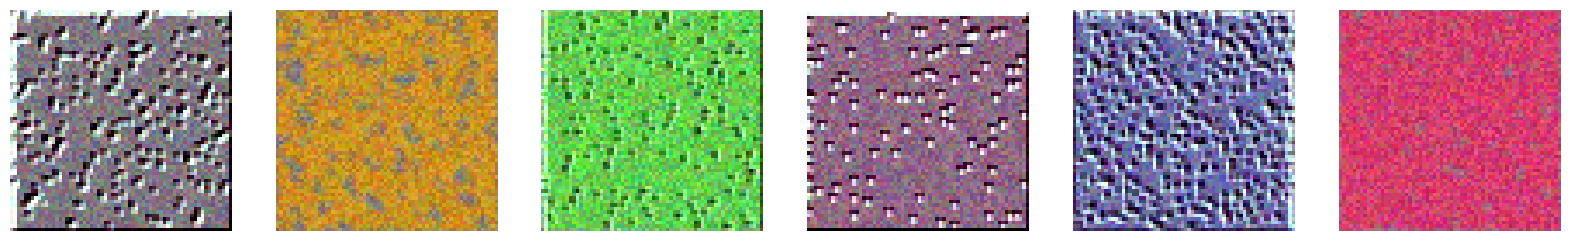

In [ ]:
fig, ax = plt.subplots(1, filters, figsize=(20, 20))
for i in range(filters):
    filter_img = visualize_filter(layer_name, i, size=size)
    ax[i].imshow(filter_img)
    ax[i].axis('off')
plt.show()

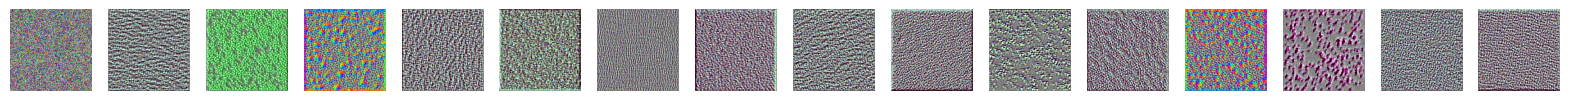

In [ ]:
#visualizing filters of second layer
layer_name = 'block2_conv1'
size = 128
filters = 16
fig, ax = plt.subplots(1, filters, figsize=(20, 20))
for i in range(filters):
    filter_img = visualize_filter(layer_name, i, size=size)
    ax[i].imshow(filter_img)
    ax[i].axis('off')
plt.show()


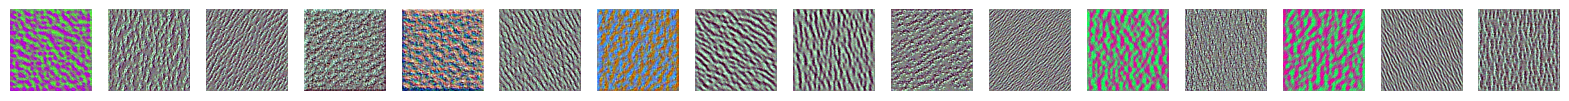

In [ ]:
#visualizing filters of second layer
layer_name = 'block2_pool'
size = 128
filters = 16
fig, ax = plt.subplots(1, filters, figsize=(20, 20))
for i in range(filters):
    filter_img = visualize_filter(layer_name, i, size=size)
    ax[i].imshow(filter_img)
    ax[i].axis('off')
plt.show()


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# Load and preprocess the image
def load_and_preprocess_image(image_path, size=(224, 224)):
    img = load_img(image_path, target_size=size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array, img

In [ ]:
model = VGG16(weights = 'imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
def apply_occlusion_and_heatmap(model, img_array, img, patch_size=32, stride=16, target_class=None):
  # Get the original prediction
      original_pred = model.predict(img_array)
      original_class = np.argmax(original_pred[0])



      heatmap = np.zeros((img_array.shape[1], img_array.shape[2]))

      for y in range(0, img_array.shape[1] - patch_size+1, stride):
          for x in range(0, img_array.shape[2] - patch_size+1, stride):
            # Copy the image and apply the occlusion
              occluded_img = img_array.copy()
              occluded_img[:, y:y+patch_size, x:x+patch_size, :] = 0  # Apply black patch

            # Get the prediction for the occluded image
              occluded_pred = model.predict(occluded_img)
              if occluded_pred.shape[1] != 1000:
                   print(f"Unexpected output shape: {occluded_pred.shape}")
                   return
              occluded_prob = occluded_pred[0][original_class]
              original_prob = original_pred[0][original_class]



             # Calculate the difference in probability
              prob_diff = original_prob - occluded_prob
              center_y = y + patch_size // 2
              center_x = x + patch_size // 2
              if center_y < heatmap.shape[0] and center_x < heatmap.shape[1]:
                   heatmap[center_y, center_x] = prob_diff


      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)


      plt.imshow(img)
      plt.title(f'Original Image (Predicted Class: {decode_predictions(original_pred, top=1)[0][0][1]})')
      plt.axis('off')
      plt.show()

      plt.imshow(img)
      plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap on the image
      plt.title('Occlusion Sensitivity Heatmap')
      plt.axis('off')
      plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

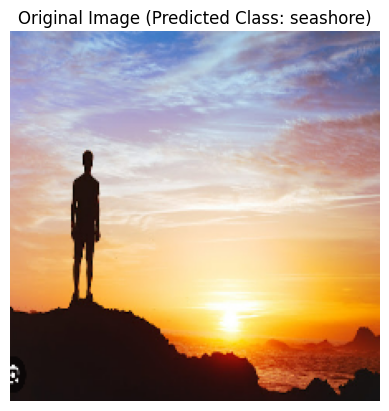

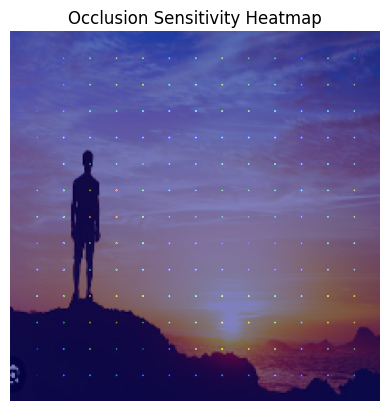

In [ ]:
image_path = r'/content/pic.png'  # Replace with the path of your image
img_array, img = load_and_preprocess_image(image_path)

# Apply occlusion and visualize heatmap
apply_occlusion_and_heatmap(model, img_array, img, patch_size=32, stride=16)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

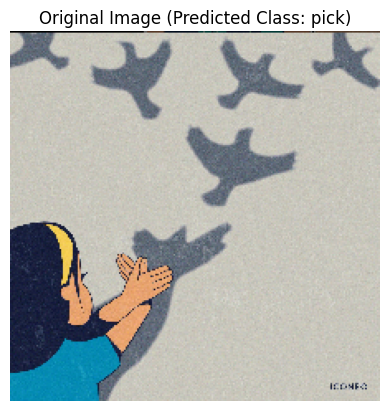

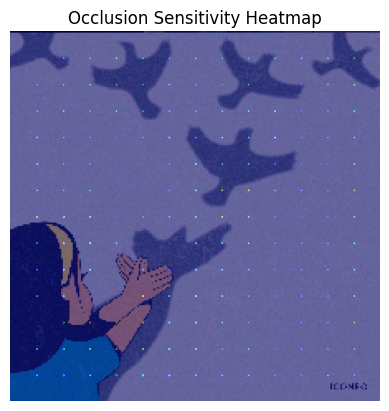

In [ ]:
image_path = r'/content/girl.png'  # Replace with the path of your image
img_array, img = load_and_preprocess_image(image_path)

# Apply occlusion and visualize heatmap
apply_occlusion_and_heatmap(model, img_array, img, patch_size=32, stride=16)

In [ ]:
from keras.applications import VGG16
from keras import backend as K
from keras.preprocessing import image

In [ ]:
# Function to preprocess input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    return img_array, img

In [ ]:
def guided_backpropagation(model, img_array, target_class):
      # Create a model that outputs the gradients of the input with respect to the output
      grad_model = tf.keras.models.Model(inputs=model.input, outputs=[model.output, model.layers[-1].output])
      img_tensor = tf.convert_to_tensor(img_array)

      # Get the gradients
      with tf.GradientTape() as tape:
      # Forward pass
          tape.watch(img_tensor)
          model_output, last_layer_output = grad_model(img_tensor)
          loss = model_output[0][target_class]

      # Backward pass
          grads = tape.gradient(loss, img_tensor)

     # Guided backpropagation: only retain positive gradients
          guided_grads = tf.where(grads > 0, grads, tf.zeros_like(grads))

          return guided_grads.numpy()[0]


In [ ]:
def visualize_guided_backpropagation(img_path, target_class):
      img_array, img = preprocess_image(img_path)

          # Get the guided backpropagation result
      guided_grads = guided_backpropagation(model, img_array, target_class)

                  # Normalize the guided gradients for visualization
      guided_grads = (guided_grads - guided_grads.min()) / (guided_grads.max() - guided_grads.min())

                              # Plot the original image and the guided backpropagation result
      plt.figure(figsize=(10, 5))
      plt.subplot(1, 2, 1)
      plt.imshow(img)
      plt.title('Original Image')
      plt.axis('off')

      plt.subplot(1, 2, 2)
      plt.imshow(guided_grads, cmap='jet')
      plt.title('Guided Backpropagation')
      plt.axis('off')

      plt.show()

In [ ]:
def get_predicted_class(img_path):
      img_array, img = preprocess_image(img_path)

      # Make prediction
      preds = model.predict(img_array)

       # Get the index of the class with the highest probability
      predicted_class_index = np.argmax(preds[0])

      # Decode the predicted class using ImageNet class index
      from keras.applications.vgg16 import decode_predictions
      predicted_class_label = decode_predictions(preds, top=1)[0][0][1]

      return predicted_class_index, predicted_class_label

In [ ]:
img_path = r'/content/tiger.jpg'   # Update with your image path
predicted_class_index, predicted_class_label = get_predicted_class(img_path)

print(f'Predicted Class Index: {predicted_class_index}')
print(f'Predicted Class Label: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Class Index: 292
Predicted Class Label: tiger


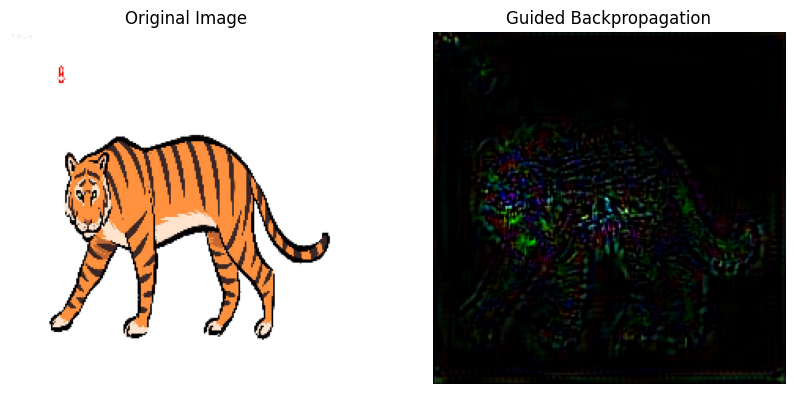

In [ ]:
target_class = 292 # Upd
visualize_guided_backpropagation(img_path, target_class)